   #  Breast Cancer Wisconsin (Diagnostic)


In [29]:
#import the necessary libraries to be used in the process of analyzing the data and creation of model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn import metrics

In [3]:
#loading dataset
db = pd.read_csv('data.csv')

In [4]:
#now as we have imported the data, it's time to better understand the data like what is the shape,size,features etc in our data
print(db.info())
print('                                                                      ')
print('                                                                      ')
print(db.shape)
print('                                                                      ')
print('                                                                      ')
print(db.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

## features specification
The entire data.csv contains 32 features but we use only 30 features to predict the Stage of Breast Cancer M (Malignant) and B (Bengin) 

Ten real-valued features are computed for each cell nucleus:

radius (mean of distances from center to points on the perimeter) 

texture (standard deviation of gray-scale values) 

perimeter 

area 

smoothness (local variation in radius lengths) 

compactness (perimeter^2 / area - 1.0) 

concavity (severity of concave portions of the contour) 

concave points (number of concave portions of the contour) 

symmetry 

fractal dimension ("coastline approximation" - 1)

In [5]:
#id is the column or feature which is not used to predict the Stage of Breast Cancer so we can drop that column
db.drop("id", axis = 1, inplace = True)
#Numerize diagnosis "M" malignant; "B" benign using a dictionary and map function
diagnosis_coding = {'M':1, 'B':0}
db.diagnosis = db.diagnosis.map(diagnosis_coding)

In [6]:
#Reorder columns so diagnosis is at right-most
#Now define a diagnosis series object
diagnosis = db.diagnosis
#Then drop diagnosis from dataframe
db.drop('diagnosis', axis = 1, inplace = True)
# Then append diagnosis to end of dataframe
db['Diagnosis'] = diagnosis

In [7]:
db.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [8]:
# Quick glimpse of tumor features (mean values) With respect to the diagnosis
db.groupby('Diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
Diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [9]:
### Explore the Data now
db.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


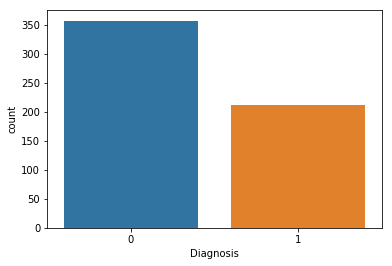

In [10]:
sns.countplot(db['Diagnosis'],label="Count")

##   Testing the accuracy without feature reduction

In [11]:
X =db[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean','fractal_dimension_mean',
                 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
                 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst','fractal_dimension_worst']]

y = db['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [12]:
# a simple random forest model
model=RandomForestClassifier(n_estimators=100)
# now fit our model for traing data
model.fit(X_train,y_train)
prediction=model.predict(X_test)
metrics.accuracy_score(prediction,y_test ) 

0.9473684210526315

In [13]:
# lets now try with SVM
model = svm.SVC()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
metrics.accuracy_score(prediction,y_test)

0.6023391812865497

In [14]:
#try with KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
metrics.accuracy_score(prediction,y_test)

0.9532163742690059

In [15]:
#try with GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
metrics.accuracy_score(prediction,y_test)

0.9415204678362573

In [16]:
#try with DecisionTreeClassifier
model =DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
metrics.accuracy_score(prediction,y_test)

0.9239766081871345

In [17]:
#try with LogisticRegression
model =LogisticRegression()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
metrics.accuracy_score(prediction,y_test)

0.9532163742690059

From the above analysis I can conclude that LogisticRegression and KNeighborsClassifier gives equal and highest accuracy for the entire data.

## Testing the accuracy with feature reduction 

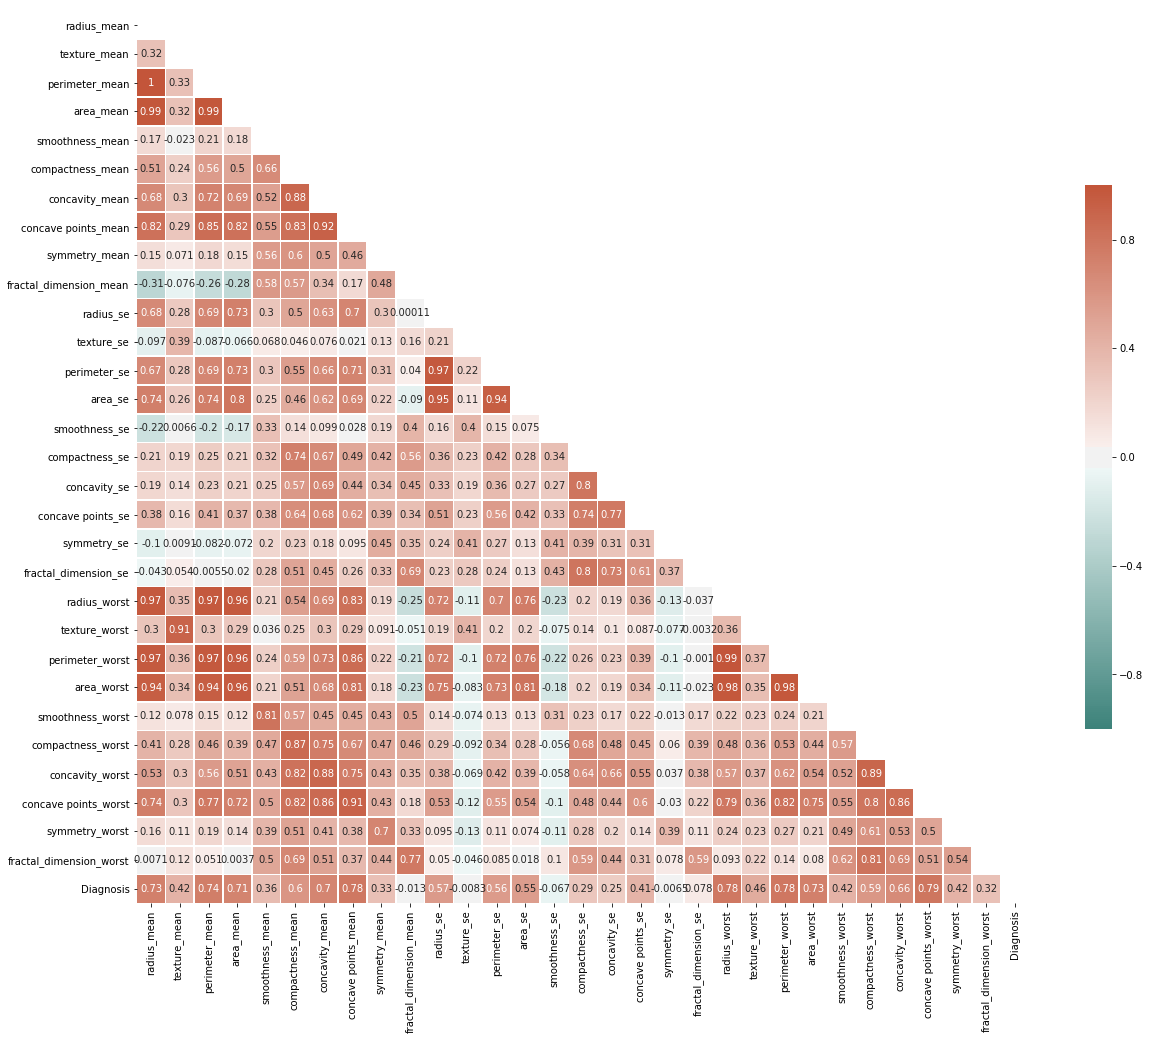

In [18]:
correlation = db.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [19]:
X_corr = db[['smoothness_mean', 'radius_se', 'texture_se', 'smoothness_se', 'symmetry_se', 
                       'fractal_dimension_se', 'texture_worst', 'symmetry_worst','fractal_dimension_worst']]
y_corr = db['Diagnosis']

One of the dataset's hallmarks is relatively high correlation coefficient score - only score no higher than 0.6 will be considered acceptable.
Correlation not necceserily means causation, that is why features will not be exluded only for their low correlation with diagnosis.
Hence the selected features are 'smoothness_mean', 'radius_se', 'texture_se', 'smoothness_se', 'symmetry_se','fractal_dimension_se', 'texture_worst', 'symmetry_worst','fractal_dimension_worst'.

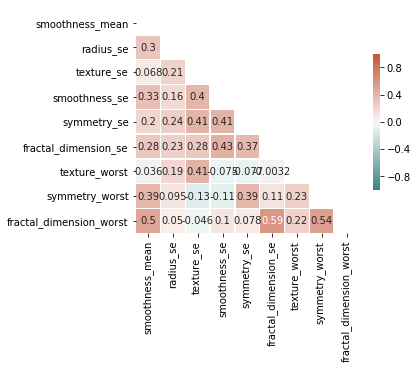

In [20]:
correlation = X_corr.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(5, 5))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

Features to be included: 'smoothness_mean', 'radius_se', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se', 'texture_worst', 'symmetry_worst', 'fractal_dimension_worst'.

Dividing the dataset into a separate training and test set:

In [21]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_corr,y_corr,test_size=0.3)

In [22]:
# a simple random forest model
model=RandomForestClassifier(n_estimators=100)
# now fit our model for traing data
model.fit(X_train1,y_train1)
prediction=model.predict(X_test1)
metrics.accuracy_score(prediction,y_test1) 

0.9064327485380117

In [23]:
# lets now try with SVM
model = svm.SVC()
model.fit(X_train1,y_train1)
prediction=model.predict(X_test1)
metrics.accuracy_score(prediction,y_test1)

0.8011695906432749

In [24]:
#try with KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model.fit(X_train1,y_train1)
prediction=model.predict(X_test1)
metrics.accuracy_score(prediction,y_test1)

0.8245614035087719

In [28]:
#try with GaussianNB
model = GaussianNB()
model.fit(X_train1,y_train1)
prediction=model.predict(X_test1)
metrics.accuracy_score(prediction,y_test1)

0.8888888888888888

In [26]:
#try with DecisionTreeClassifier
model =DecisionTreeClassifier()
model.fit(X_train1,y_train1)
prediction=model.predict(X_test1)
metrics.accuracy_score(prediction,y_test1)

0.8187134502923976

In [27]:
#try with LogisticRegression
model =LogisticRegression()
model.fit(X_train1,y_train1)
prediction=model.predict(X_test1)
metrics.accuracy_score(prediction,y_test1)

0.9005847953216374

From the above analysis I observe that,
when we use the entire features in the data in that case LogisticRegression and KNeighborsClassifier gives equal and highest accuracy.
when we done the process of feature reduction then LogisticRegression and RandomForestClassifier gives approximately equal and highest accuracy.
After FeatureReduction process is done then,
The accuarcy given by RandomForestClassifier,KNeighborsClassifier, GaussianNB,DecisionTreeClassifier,LogisticRegression decreases where as the accuarcy given by SVC increases.
So from the above accuracy scores obtained by using different classification models (including with feature reduction and without feature reduction) I considered Logistic regression is the best and optimized model  